# VGG Net 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [3]:
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [4]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19()
vgg19.summary()

574726144/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [5]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving cat1.jfif to cat1.jfif
Saving cat2(lulu).jfif to cat2(lulu).jfif


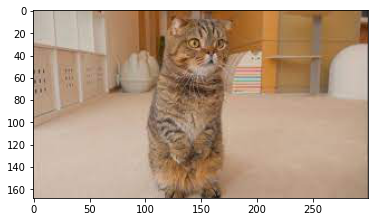

In [7]:
import matplotlib.pyplot as plt

img = Image.open('cat2(lulu).jfif')
plt.imshow(img);

- 이미지 예측

In [11]:
yhat = vgg16.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n03404251', 'fur_coat', 0.17607442),
   ('n04325704', 'stole', 0.08769076),
   ('n04367480', 'swab', 0.075560145),
   ('n04209239', 'shower_curtain', 0.07240704),
   ('n03903868', 'pedestal', 0.05399607)]])

In [12]:
label[0][0][1], label[0][0][2]

('fur_coat', 0.17607442)

In [13]:
yhat = vgg19.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('window_shade', 0.19747926)

- 이미지를 224x224 사이즈로 자르기

In [15]:
img = Image.open('cat2(lulu).jfif')
h, w, _ = np.array(img).shape
h, w

(168, 300)

In [17]:
if h > w:
    width, height = 224, (h * 224) // w
else:
    width, height = (w * 224) // h, 224
height, width

(224, 400)

In [18]:
new_img = np.array(img.resize((height,width)))
new_img.shape

(400, 224, 3)

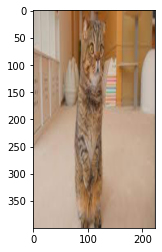

In [19]:
plt.imshow(new_img);

In [21]:
diff = abs(width - height)//2
if width > height:
    final_img = new_img[:, diff:diff+224, :]
else:
    final_img = new_img[diff:diff+224, :, :]
final_img.shape

(400, 136, 3)

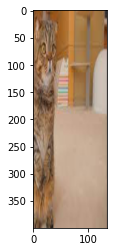

In [23]:
plt.imshow(final_img);

In [24]:
def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = 224, (h * 224) // w
    else:
        width, height = (w * 224) // h, 224

    new_img = np.array(img.resize((width,height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+224, :]
    else:
        final_img = new_img[diff:diff+224, :, :]
    
    return final_img

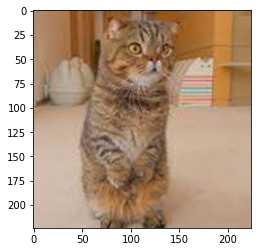

In [25]:
img = Image.open('cat2(lulu).jfif')
img2 = center_image(img)
plt.imshow(img2);